In [1]:
import numpy as np
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, "savefig.dpi":300})
sns.set_context("notebook")
sns.set_style("ticks")

# Dimensionality Reduction Examples

## Objectives
+ Understand the dimensionality reduction problem
+ Use principal component analysis to solve the dimensionality reduction problem

Through out this lecture we will be using the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database).
The MNIST dataset consists of thousands of images of handwritten digits from $0$ to $1$.
The dataset is a standard benchmark in machine learning.
Here is how to get the dataset from the tensorflow library:

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X / 255.0

# Split data into train partition and test partition
np.random.seed(12345)
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

The dataset comes with inputs (that are images of digits) and labels (which is the label of the digit).
We are not going to use the labels in this lecture as we will be doing unsupervised learning.
Let's look at the dimensions of the training dataset:

In [3]:
x_train.shape

(49000, 784)

The training dataset is a 3D array.
The first dimension is 49,0000. This is the number of different images that we have.
Then each image consists of 28x28 pixels.
Here is the first image in terms of numbers:

In [4]:
x_train[0]

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.333, 1.   , 0.09 , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.149, 0.969, 0.996, 0.09 , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ,

Each number corresponds to the pixel value.
Say, zero is a white pixel and 255 is a black pixel.
Values between 0 and 255 correspond to some shade of gray.
Here is how to visualize the first image:

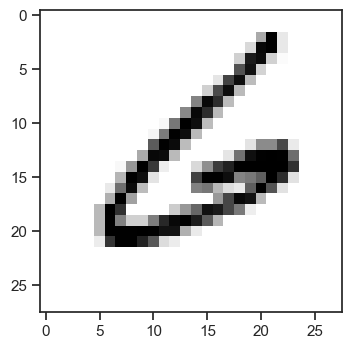

In [5]:
plt.imshow(x_train[0].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest');

In this handout, I want to work with just images of threes.
So, let me just keep all the threes and throw away all other data:

In [6]:
threes = x_train[y_train == '3']
threes.shape

(5024, 784)

Okay. You see that we now have a few thousand vectors each with 784 dimensions.
That is our dataset.
Let's apply PCA to it to reduce its dimensionality.
We are going to use the [PCA class of scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).
Here is how to import the class:

In [7]:
from sklearn.decomposition import PCA

And here is how to initialize the model and fit it to the data:

In [8]:
pca = PCA(n_components=0.98, whiten=True).fit(threes)

For the complete definition of the inputs to the ``PCA`` class, see its documentation.
The particular parameters that I define above have the following effect:
- ``n_components``: If you set this to an integer, the PCA will have this many components. If you set it to a number between $0$ and $1$, say 0.98, then PCA will keep as many components as it needs in order to capture 98% of the variance of the data. I use the second type of input.
- ``whiten``: This ensures that the projections have unit variance. If you don't specify this then their variance will be the corresponding eigenvalue. Setting ``whiten=True`` is consistent with the theory developed in the video.

Okay, so now that the model is trained let's investigate it.
First, we asked PCA to keep enough components so that it can describe 98% of the variance.
How many did it actually keep?
Here is how to check this:

In [9]:
pca.n_components_

225

It kept 227 compents. This doesn't look very impressive but we will take it for now.

Now, let's focus on the eigenvalues of the covariance matrix.
Here is how to get them:

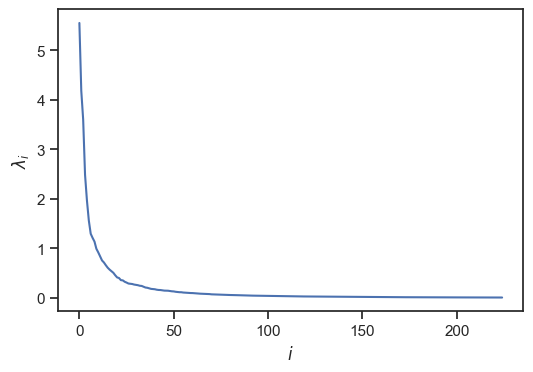

In [10]:
fig, ax = plt.subplots()
ax.plot(pca.explained_variance_)
ax.set_xlabel('$i$')
ax.set_ylabel(r'$\lambda_i$');

Remember that the sum of first $k$ eigenvalues, $\sum_{i=1}^k\lambda_i$ tells you how much variance is explained with a model that keeps the first $k$ PCA components.

Okay.
As we discussed in the lecture videos, each of the observations expanded as follows:

$$
\mathbf{x}_j = \mathbf{m} + \sum_{i=1}^kz_{ji}\sqrt{\lambda}_i\mathbf{v}_i.
$$

Let's visualize first the mean $\mathbf{m}$.
It is this vector:

In [11]:
pca.mean_.shape

(784,)

so let's reshape it and plot it as an image:

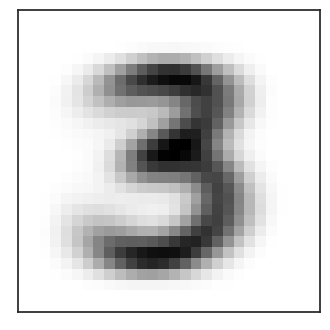

In [12]:
def show_digit_image(data):
    """Show a digit as an image.
    
    Arguments
    data -- The image data.
    """
    fig, ax = plt.subplots()
    ax.imshow(data.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([]);

show_digit_image(pca.mean_)

Now let's go for the eigenvectors $\mathbf{v}_i$.
Here is where the are:

In [13]:
pca.components_.shape

(225, 784)

and here is how to visualize them as images:

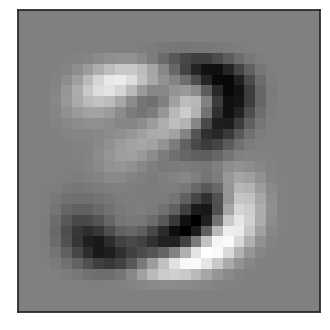

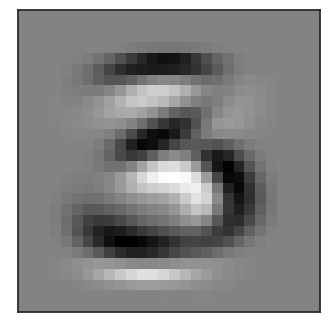

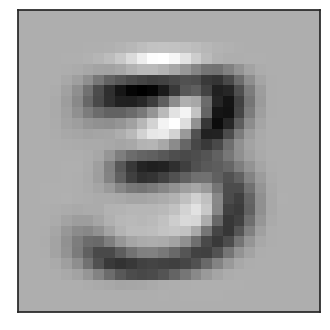

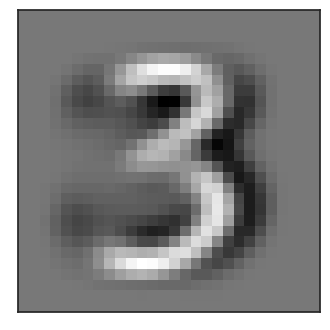

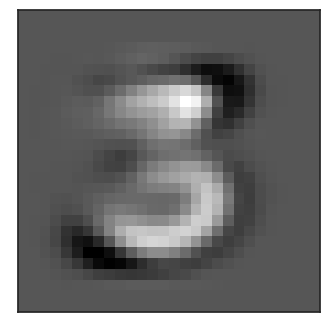

In [14]:
for i in range(5):
    show_digit_image(
        pca.components_[i, :]
    )

Now, let's visulize the first two principal components $\mathbf{z}_j$ of each observation $\mathbf{x}_j$.
This will essentially project the dataset from 784 dimensions to two dimensions.
Here is how to find the principal components:

In [15]:
Z = pca.transform(threes)
Z.shape

(5024, 225)

Visualize the first two:

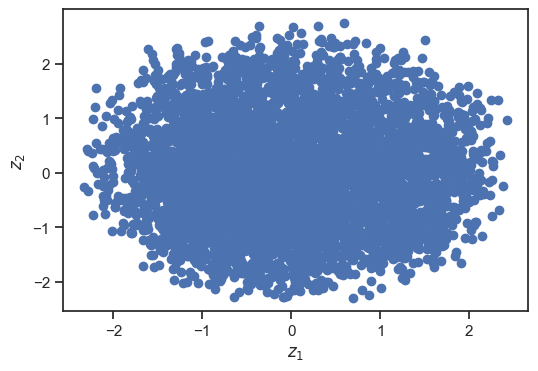

In [16]:
fig, ax = plt.subplots()
ax.scatter(Z[:, 0], Z[:, 1])
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$');

Alright! Each dot in this plot corresponds to an image of a 3.
This is nice, but not the best thing we can do in terms of visualization.
It would be nice if we could plot the actual image instead of a dot.
Here is how to do this:

In [17]:
# The following code is a modification of the code found here:
# https://stackoverflow.com/questions/35651932/plotting-img-with-matplotlib
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data

def imscatter(
    x,
    y,
    images,
    cmap=plt.cm.gray_r,
    ax=None,
    zoom=1
):
    """Do a scatter plot with images instead of points.
    
    Arguments
    x      -- The x coordinates.
    y      -- The y coordinates.
    images -- The images. Must be of shape (x.shape[0], d, d).
    
    Keyword Arguments
    cmap   -- A color map.
    ax     -- An axes object to plot on.
    zoom   -- How much to zoom.
    """
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0, image in zip(x, y, images):
        im = OffsetImage(
            image,
            zoom=zoom,
            cmap=cmap,
            interpolation='nearest'
        )
        ab = AnnotationBbox(
            im,
            (x0, y0),
            xycoords='data',
            frameon=False
        )
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

Here it is:

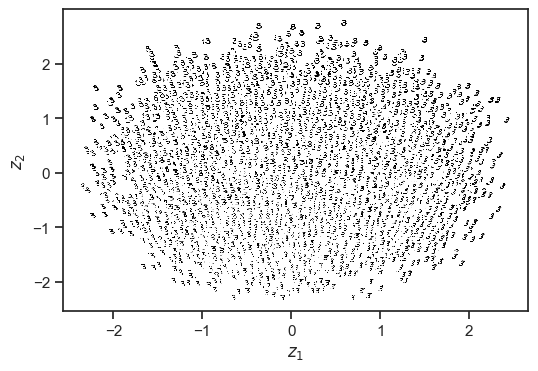

In [18]:
fig, ax = plt.subplots()
imscatter(
    Z[:, 0],
    Z[:, 1],
    threes.reshape((threes.shape[0], 28, 28)),
    ax=ax,
    zoom=0.2
)
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$');

In this plot you can clearly see the interpretation of the principal components.
The first principal component seems to rotate the three about an axis coming out of the screen.
The second principal component seems to change the thickness of the bottom of the three.

### Questions

+ Keeping the index $i=0$ fixed, play with the corresponding $z$ and observe that it rotates the three.
+ Change $i$ to $1,2$ and $3$ and study the effect of the corresponding principal component.

Now we are going to study the reconstruction error for the validation dataset.
First, throw everything that is not a three:

In [19]:
valid_threes = x_test[y_test == '3']
valid_threes.shape

(2117, 784)

We have about two thousand images for validation.
Project all the validation points:

In [20]:
Z_valid = pca.transform(valid_threes)

And then reconstruct them and compare them.

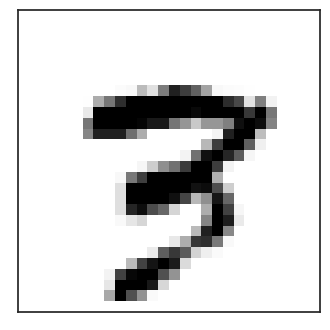

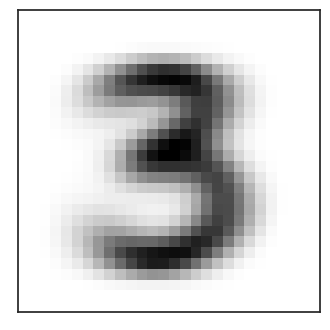

In [21]:
# Reconstruct image
idx = 1
n_components = 1
x = pca.inverse_transform(
    np.hstack(
        [
            Z_valid[idx][:n_components],
            np.zeros((Z_valid.shape[1] - n_components,))
        ]
    )
)

# The original image
show_digit_image(valid_threes[idx])

# The reconstructed image
show_digit_image(x)

### Questions
+ Play with the code block above increasing ``n_components`` to 2, 4, 8, and so on up to 227. Observe how the reconstruction becomes better (but not perfect).
+ Repeat the above question, but change also the ``idx`` variable so that you see some more examples of three.
+ Go back a few code blocks, and change your validation set to include only fives.
You must change this:
```
valid_threes = x_test[y_test == '3']
valid_threes.shape
```
to this:
```
valid_threes = x_test[y_test == '5']
valid_threes.shape
```
Don't bother renaming ``valid_threes``.
Can the PCA model constructed with threes describe 5s? Why yes or why not?
+ Repeat the previous question with a couple of other digits.